<a href="https://colab.research.google.com/github/muzammil002/Deep_Learning_Project/blob/main/Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Text_book.txt to Text_book.txt


In [3]:
file = open("/content/Text_book.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Frankenstein, by Mary Wollstonecraft (Godwin) Shelley This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are locat'

In [5]:
len(data)

436916

#Apply tokenization

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

#text to sequence can be done by this

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
#this will convert text to number
sequence_data[:15]

[1, 99, 86, 683, 4, 301, 23, 2353, 2354, 2355, 2356, 25, 683, 31, 22]

In [8]:
len(sequence_data)

78466

In [10]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

#these are uniques word

7495


7495

In [11]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'of': 4,
 'to': 5,
 'my': 6,
 'a': 7,
 'in': 8,
 'that': 9,
 'was': 10,
 'me': 11,
 'with': 12,
 'but': 13,
 'had': 14,
 'you': 15,
 'he': 16,
 'which': 17,
 'it': 18,
 'not': 19,
 'as': 20,
 'his': 21,
 'for': 22,
 'by': 23,
 'on': 24,
 'this': 25,
 'from': 26,
 'be': 27,
 'have': 28,
 'her': 29,
 'at': 30,
 'is': 31,
 'when': 32,
 'were': 33,
 'your': 34,
 'or': 35,
 'she': 36,
 'him': 37,
 'all': 38,
 'an': 39,
 'if': 40,
 'so': 41,
 'they': 42,
 'one': 43,
 'will': 44,
 'are': 45,
 'could': 46,
 'been': 47,
 'their': 48,
 'would': 49,
 'we': 50,
 'no': 51,
 'who': 52,
 'more': 53,
 'these': 54,
 'should': 55,
 'now': 56,
 'yet': 57,
 'before': 58,
 'some': 59,
 'myself': 60,
 'what': 61,
 'man': 62,
 'do': 63,
 'our': 64,
 'upon': 65,
 'them': 66,
 'am': 67,
 'its': 68,
 'only': 69,
 'into': 70,
 'any': 71,
 'did': 72,
 'life': 73,
 'may': 74,
 'than': 75,
 'father': 76,
 'every': 77,
 'then': 78,
 'first': 79,
 'might': 80,
 'shall': 81,
 'own': 82,

#input to the model will be three words and output will be one word 

In [12]:
sequences = []

#creating the input data

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  78463


array([[   1,   99,   86,  683],
       [  99,   86,  683,    4],
       [  86,  683,    4,  301],
       [ 683,    4,  301,   23],
       [   4,  301,   23, 2353],
       [ 301,   23, 2353, 2354],
       [  23, 2353, 2354, 2355],
       [2353, 2354, 2355, 2356],
       [2354, 2355, 2356,   25],
       [2355, 2356,   25,  683]])

In [13]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [14]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1   99   86]
 [  99   86  683]
 [  86  683    4]
 [ 683    4  301]
 [   4  301   23]
 [ 301   23 2353]
 [  23 2353 2354]
 [2353 2354 2355]
 [2354 2355 2356]
 [2355 2356   25]]
Response:  [ 683    4  301   23 2353 2354 2355 2356   25  683]


converting into binary class function

In [15]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Creating Model

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             74950     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7495)              7502495   
                                                                 
Total params: 20,626,445
Trainable params: 20,626,445
Non-trainable params: 0
_________________________________________________________________


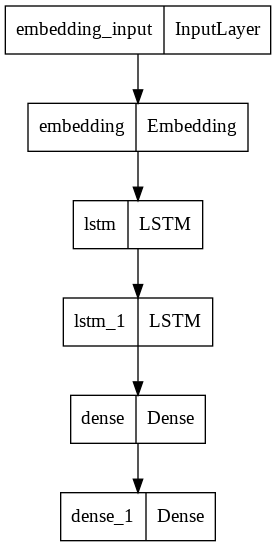

In [18]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

#Training Model

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint])

Epoch 1/20
1225/1226 [============================>.] - ETA: 0s - loss: 4.6408
Epoch 1: loss improved from inf to 4.64120, saving model to next_words.h5
1226/1226 [==============================] - 43s 32ms/step - loss: 4.6412
Epoch 2/20
1225/1226 [============================>.] - ETA: 0s - loss: 4.3281
Epoch 2: loss improved from 4.64120 to 4.32823, saving model to next_words.h5
1226/1226 [==============================] - 40s 33ms/step - loss: 4.3282
Epoch 3/20
1225/1226 [============================>.] - ETA: 0s - loss: 4.0591
Epoch 3: loss improved from 4.32823 to 4.05929, saving model to next_words.h5
1226/1226 [==============================] - 40s 33ms/step - loss: 4.0593
Epoch 4/20
1225/1226 [============================>.] - ETA: 0s - loss: 3.7787
Epoch 4: loss improved from 4.05929 to 3.77936, saving model to next_words.h5
1226/1226 [==============================] - 40s 33ms/step - loss: 3.7794
Epoch 5/20
1226/1226 [==============================] - ETA: 0s - loss: 3.4815
E

In [21]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [22]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: My name is
['My', 'name', 'is']
busy
Enter your line: What you doing
['What', 'you', 'doing']
‘now
Enter your line: I love you
['I', 'love', 'you']
and
Enter your line: The Project Gutenberg
['The', 'Project', 'Gutenberg']
tm
Enter your line: 0
Execution completed.....
